In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline
sns.set()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

<div style="
    background-color: #F1C40F;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    Explore Data 
</div

In [4]:
df = pd.read_excel('online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
403761,528082,22743,MAKE YOUR OWN FLOWERPOWER CARD KIT,1,2010-10-20 12:53:00,2.95,16521.0,United Kingdom
188419,507281,82483,WOOD 2 DRAWER CABINET WHITE FINISH,16,2010-05-07 13:29:00,4.95,13089.0,United Kingdom
132516,501922,48194,DOOR MAT HEARTS,1,2010-03-22 10:26:00,7.49,13151.0,United Kingdom
181160,506576,22278,OVERNIGHT BAG VINTAGE ROSE PAISLEY,1,2010-04-30 13:41:00,11.02,NaN,United Kingdom
345547,523003,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,12,2010-09-19 16:14:00,1.25,16264.0,United Kingdom
324648,521031,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS,1,2010-09-01 17:17:00,1.66,NaN,United Kingdom
349959,C523379,22697,GREEN REGENCY TEACUP AND SAUCER,-1,2010-09-21 19:38:00,2.55,13408.0,United Kingdom
499465,536022,22585,PACK OF 6 BIRDY GIFT TAGS,12,2010-11-29 15:54:00,1.25,16094.0,United Kingdom
195519,508077,84378,SET OF 3 HEART COOKIE CUTTERS,1,2010-05-12 16:29:00,2.51,NaN,United Kingdom
427591,530273,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,12,2010-11-02 11:52:00,2.10,12843.0,United Kingdom


In [6]:
df.shape

(525461, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [10]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [11]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

### We will search for every unique value for stock code and know what is the meaning of every element

# Stock Code  

**StockCode** is meant to follow the pattern `[0-9]{5}` but seems to have legitimate values for `[0-9]{5}[a-zA-Z]+`.  
It also contains other values:  

| Code         | Description                                                                 | Action                   |
|-------------|-----------------------------------------------------------------------------|--------------------------|
| **DCGS**    | Looks valid, some quantities are negative though, and customer ID is null   | Exclude from clustering |
| **D**       | Looks valid, represents discount values                                     | Exclude from clustering |
| **DOT**     | Looks valid, represents postage charges                                    | Exclude from clustering |
| **M or m**  | Looks valid, represents manual transactions                               | Exclude from clustering |
| **C2**      | Carriage transaction - not sure what this means                           | Exclude from clustering |
| **C3**      | Not sure, only 1 transaction                                              | Exclude                  |
| **BANK CHARGES or B** | Bank charges                                                  | Exclude from clustering |
| **S**       | Samples sent to customers                                                | Exclude from clustering |
| **TESTXXX** | Testing data, not valid                                                  | Exclude from clustering |
| **gift__XXX** | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
| **PADS**    | Looks like a legit stock code for padding                                | Include                  |
| **SP1002**  | Looks like a special request item, only 2 transactions; 3 look legit, 1 has 0 pricing | Exclude for now |
| **AMAZONFEE** | Looks like fees for Amazon shipping or something                      | Exclude for now         |
| **ADJUSTX** | Looks like manual account adjustments by admins                         | Exclude for now         |
 |

<div style="
    background-color: #3498DB;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    🧹 DATA CLEANING PROCESS ✨
</divESS ✨</div>


In [15]:
clean_df = df.copy()

In [16]:
clean_df['Invoice'] = clean_df['Invoice'].astype('str') 
clean_df = clean_df[clean_df['Invoice'].str.match(r'^\d{6}$', na=False)]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [17]:
clean_df['StockCode'] = clean_df['StockCode'].astype('str')
mask = (
    clean_df['StockCode'].str.match(r'^\d{5}$') 
    | clean_df['StockCode'].str.match(r'^\d{5}[a-zA-Z]+$') 
    | clean_df['StockCode'].str.match(r'^PADS$')
    
)

clean_df = clean_df[mask]
clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [18]:
clean_df = clean_df.dropna(subset=['Customer ID'])

In [19]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [20]:
clean_df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

<div style="
    background-color: #E67E22;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    🏷️ Feature Engineering 
</div

In [22]:
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [23]:
clean_df['Total_value'] = clean_df['Quantity'] * clean_df['Price']
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [24]:
aggregated_df = clean_df.groupby(by='Customer ID').agg(
    Monetary_value = ('Total_value','sum'),
    Frequency = ('Invoice','nunique')
)
aggregated_df.head()

,Monetary_value,Frequency
Customer ID,,
12346.0,169.36,2
12347.0,1323.32,2
12348.0,221.16,1
12349.0,2221.14,2
12351.0,300.93,1


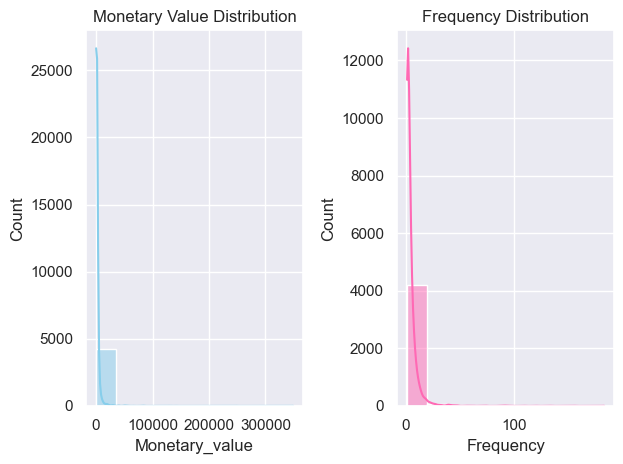

In [25]:
plt.subplot(1,2,1)
sns.histplot(data = aggregated_df , x= 'Monetary_value',kde=True,color='skyblue',bins=10)
plt.title('Monetary Value Distribution')
plt.subplot(1,2,2)
sns.histplot(data = aggregated_df , x= 'Frequency',kde=True,color='hotpink',bins=10)
plt.title('Frequency Distribution')
plt.tight_layout()
plt.show()

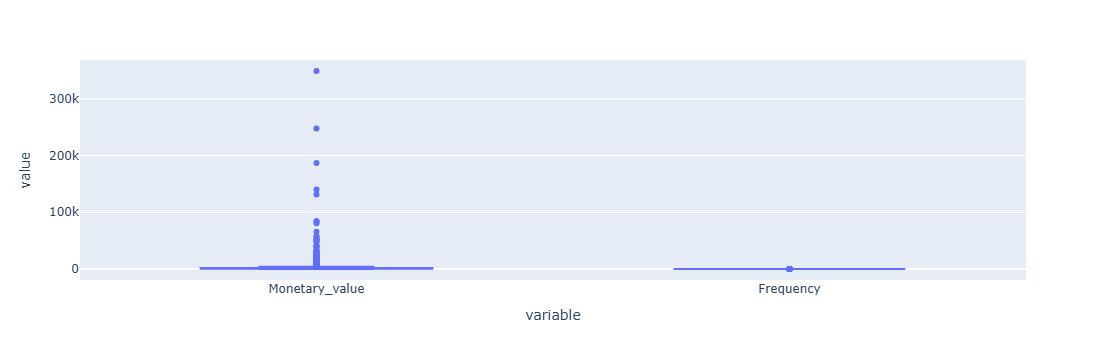

In [26]:
px.box(aggregated_df)

### We need to take the non outlier values from data,The outlier data (**VIP**) we will keep it for another analysis.

In [28]:
mon_Q1 = aggregated_df['Monetary_value'].quantile(.25)
mon_Q3 = aggregated_df['Monetary_value'].quantile(.75)
m_IQR = mon_Q3 - mon_Q1
F_Q1 = aggregated_df['Frequency'].quantile(.25)
F_Q3 = aggregated_df['Frequency'].quantile(.75)
F_IQR = F_Q3 - F_Q1
mask = (
    ((aggregated_df['Monetary_value'] < (mon_Q3 + 1.5 * m_IQR)) & (aggregated_df['Monetary_value'] > (mon_Q1 - 1.5 * m_IQR))) &
    ((aggregated_df['Frequency'] < (F_Q3 + 1.5 * F_IQR)) & (aggregated_df['Frequency'] > (F_Q1 - 1.5 * F_IQR)))
)
final_df = aggregated_df[mask].copy()
final_df

,Monetary_value,Frequency
Customer ID,,
12346.0,169.36,2
12347.0,1323.32,2
12348.0,221.16,1
12349.0,2221.14,2
12351.0,300.93,1
...,...,...
18283.0,641.77,6
18284.0,411.68,1
18285.0,377.00,1


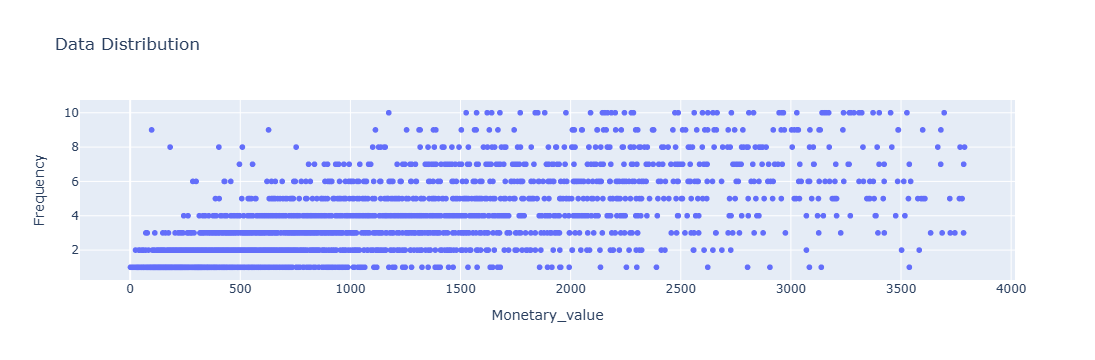

In [29]:
px.scatter(final_df,x= 'Monetary_value',y='Frequency',title='Data Distribution')

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
data = sc.fit_transform(final_df)
data

array([[-0.87339886, -0.3771414 ],
       [ 0.55399178, -0.3771414 ],
       [-0.80932486, -0.84043061],
       ...,
       [-0.6165586 , -0.84043061],
       [ 0.4588827 , -0.3771414 ],
       [ 1.75678943,  0.54943702]])

<div style="
    background-color: #2ECC71;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    KMeans Clustering
</div

## 🔹 K-Means Clustering
K-Means is an unsupervised machine learning algorithm used for clustering. It partitions the data into **K** clusters by minimizing the variance within each cluster.

### 🔹 How It Works:
1. **Choose K**: Select the number of clusters.
2. **Initialize Centroids**: Place K random centroids in the dataset.
3. **Assign Points**: Each data point is assigned to the nearest centroid.
4. **Update Centroids**: Recalculate the centroids based on assigned points.
5. **Repeat** until centroids no longer change.

### ✅ Pros:
✔️ Simple & fast for large datasets  
✔️ Works well with well-separated clusters  

### ❌ Cons:
❌ Sensitive to the initial placement of centroids  
❌ Struggles with non-spherical clusters  

📌 *Use the Elbow Method or Silhouette Score to determine the best K value!*


In [33]:
from sklearn.cluster import KMeans

## 📈 Elbow Method for K Selection
The **Elbow Method** helps determine the optimal number of clusters (K) in K-Means by analyzing the **Within-Cluster Sum of Squares (WCSS)**.

### 🔹 Steps:
1. Compute K-Means for different values of **K**.
2. Plot **WCSS vs. K**.
3. Find the **"elbow point"**, where WCSS stops decreasing significantly.

📌 *The optimal K is at the elbow point, where adding more clusters doesn’t improve performance much.*


In [35]:
from sklearn.metrics import silhouette_score

## 📊 Silhouette Score: Measuring Cluster Quality
The **Silhouette Score** evaluates how well clusters are separated and how similar points are within their assigned cluster.

### 🔹 Formula:
\[
S = \frac{b - a}{\max(a, b)}
\]
- **a** = Average distance between a point and other points in the same cluster  
- **b** = Average distance between a point and the nearest neighboring cluster  

### 📌 Score Interpretation:
✔️ **Close to +1** → Well-clustered data  
❌ **Near 0** → Overlapping clusters  
⚠️ **Close to -1** → Poor clustering  

📌 *Higher silhouette scores indicate better-defined clusters!*


In [36]:
WCSS = []
sil_s = []
for i in range (2,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    labels = kmeans.fit_predict(data)
    WCSS.append(kmeans.inertia_)
    sil_s.append(silhouette_score(data,labels))

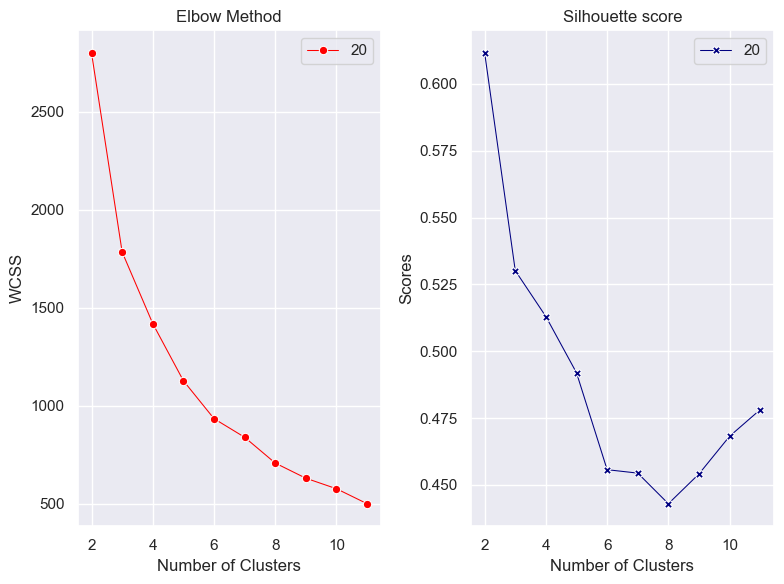

In [37]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.lineplot(x=range(2,12),y=WCSS,marker='o',color='red',size=20)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
sns.lineplot(x=range(2,12),y=sil_s,marker='X',color='navy',size=20)
plt.title('Silhouette score')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')

plt.tight_layout()
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
labels = kmeans.fit_predict(data)

In [39]:
kmeans.cluster_centers_

array([[-0.64437372, -0.65502849],
       [ 1.68236625,  2.45407044],
       [ 0.21620101,  0.39998889],
       [ 1.89610984,  0.74606558]])

In [40]:
final_df['Clusters_KMeans'] = labels
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans
Customer ID,,,
12346.0,169.36,2,0
12347.0,1323.32,2,2
12348.0,221.16,1,0
12349.0,2221.14,2,3
12351.0,300.93,1,0


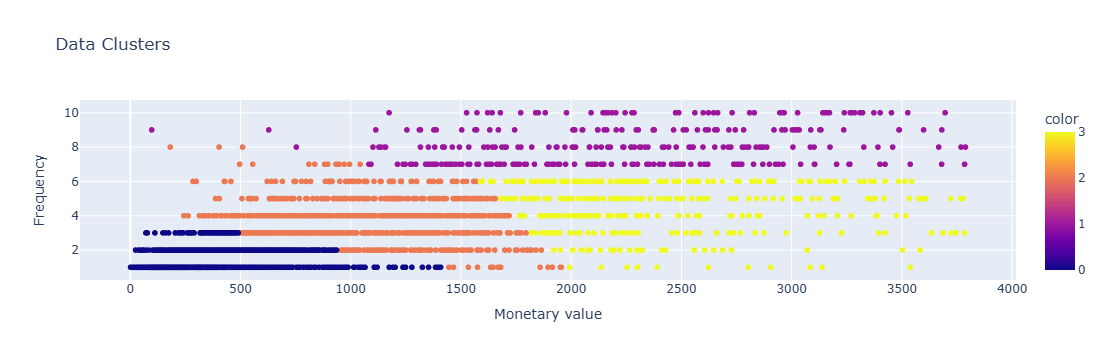

In [41]:
fig = px.scatter(x=final_df['Monetary_value'],y=final_df['Frequency'],color=labels,title='Data Clusters')
fig.update_layout(
    xaxis_title = 'Monetary value',
    yaxis_title = 'Frequency'
)
iplot(fig)

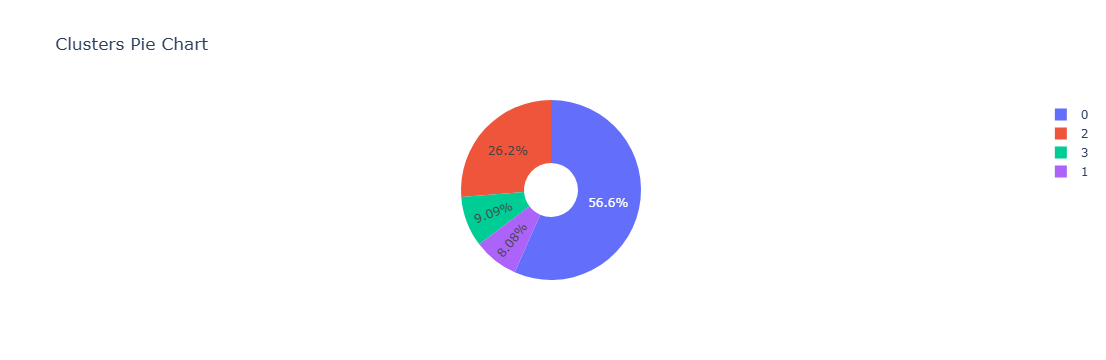

In [42]:
fig = px.pie(data_frame=final_df,names='Clusters_KMeans',title='Clusters Pie Chart',hole=.3)

iplot(fig)

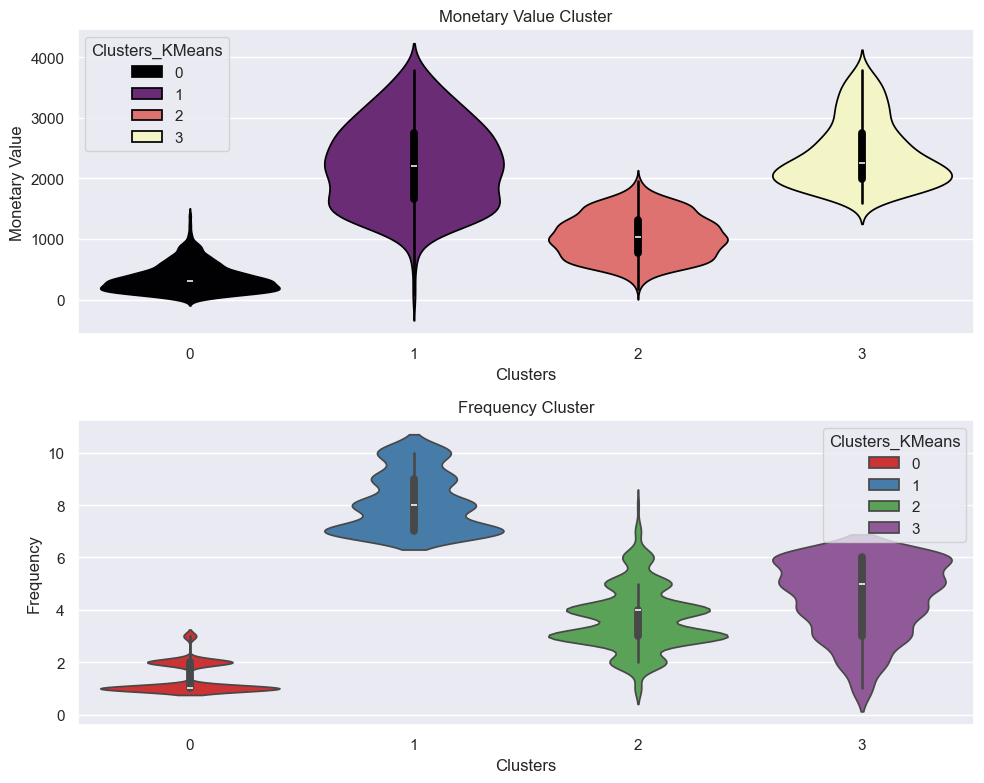

In [43]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.violinplot(data = final_df,x='Clusters_KMeans',y='Monetary_value',palette='magma',hue='Clusters_KMeans')
plt.title('Monetary Value Cluster')
plt.xlabel('Clusters')
plt.ylabel('Monetary Value')

plt.subplot(2,1,2)
sns.violinplot(data = final_df,x='Clusters_KMeans',y='Frequency',palette='Set1',hue='Clusters_KMeans')
plt.title('Frequency Cluster')
plt.xlabel('Clusters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analysis Results of KMeans Clustering

### Cluster 0 (Lowest Monetary & Frequency)

--> **Label**: "Low-Value Infrequent Shoppers".

--> **Description**: Customers in this cluster make very few purchases and spend a small amount. They might be one-time or very occasional buyers.

### Cluster 1 (High Monetary, Moderate Frequency)

--> **Label**: "High-Value Regular Customers".

--> **Description**: This cluster consists of customers who spend a significant amount but are not necessarily the most frequent shoppers. They are valuable customers with consistent spending patterns.

### Cluster 2 (Moderate Monetary & Frequency)

--> **Label**: "Average Customers".

--> **Description**: These customers have an average purchasing pattern in both frequency and spending. They represent a balanced customer base.

### Cluster 3 (High Monetary, High Frequency)

--> **Label**: "Loyal High-Spending Customers".

--> **Description**: These are the most valuable customers, shopping frequently and spending the highest amounts. They likely represent loyal and engaged customers.

In [112]:
cluster_labels = {
    0: "Low-Value Infrequent",
    1: "High-Value Regular",
    2: "Average Customer",
    3: "Loyal High-Spender"
}

In [114]:
final_df['KMeans Labels'] = final_df['Clusters_KMeans'].map(cluster_labels)

In [116]:
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans,Clusters_DBSCAN,KMeans Labels
Customer ID,,,,,
12346.0,169.36,2,0,0,Low-Value Infrequent
12347.0,1323.32,2,2,0,Average Customer
12348.0,221.16,1,0,1,Low-Value Infrequent
12349.0,2221.14,2,3,-1,Loyal High-Spender
12351.0,300.93,1,0,1,Low-Value Infrequent


<div style="
    background-color: #9B59B6;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    DBSCAN Clustering
</div

## 🔹 DBSCAN: Density-Based Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an **unsupervised clustering algorithm** that groups **dense** regions of data while identifying **outliers (noise)**.

### 🔹 How It Works:
1. **Choose Parameters**:  
   - **ε (Epsilon)**: Defines the neighborhood radius.  
   - **MinPts**: Minimum points required to form a dense region.
2. **Find Core Points**: A point is a **core** if it has at least **MinPts** neighbors within ε.
3. **Expand Clusters**:  
   - Connect **density-reachable** points.  
   - Mark points that don’t belong to any cluster as **noise**.
   
### ✅ Pros:
✔️ Finds clusters of **arbitrary shapes**.  
✔️ **Handles noise** well.  
✔️ No need to specify **K** (unlike K-Means).  

### ❌ Cons:
❌ **Choosing ε & MinPts** can be tricky.  
❌ Struggles with **varying density clusters**.  

📌 *Use **K-Distance Plot** to tune **ε** effectively!* 🚀


In [45]:
from sklearn.cluster import DBSCAN

In [142]:
bestScore = -1
bestEps = None
bestminPts = None
for eps in np.linspace(.01,10,50):
    for minPts in range(2,50):
        dbscan = DBSCAN(eps=eps,min_samples=minPts)
        Labels = dbscan.fit_predict(data)
        num_clusters = len(set(Labels)) - (1 if -1 in Labels else 0)
        if num_clusters > 1:
            score = silhouette_score(data,Labels)
            if score > bestScore:
                bestScore = score
                bestEps = eps
                bestminPts = minPts

print(f"Best Epsilon: {bestEps}, Best minPts: {bestminPts}, Best Silhouette Score: {bestScore}")  
# Best Epsilon: 0.21387755102040817, Best minPts: 49, Best Silhouette Score: 0.3305233312617535

In [194]:
dbscan = DBSCAN(eps=0.21387755102040817,min_samples=49).fit(data)

In [196]:
dbscan.labels_

array([ 0,  0,  1, ...,  1,  0, -1], dtype=int64)

In [198]:
final_df['Clusters_DBSCAN'] = dbscan.labels_
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans,Clusters_DBSCAN,KMeans Labels
Customer ID,,,,,
12346.0,169.36,2,0,0,Low-Value Infrequent
12347.0,1323.32,2,2,0,Average Customer
12348.0,221.16,1,0,1,Low-Value Infrequent
12349.0,2221.14,2,3,-1,Loyal High-Spender
12351.0,300.93,1,0,1,Low-Value Infrequent


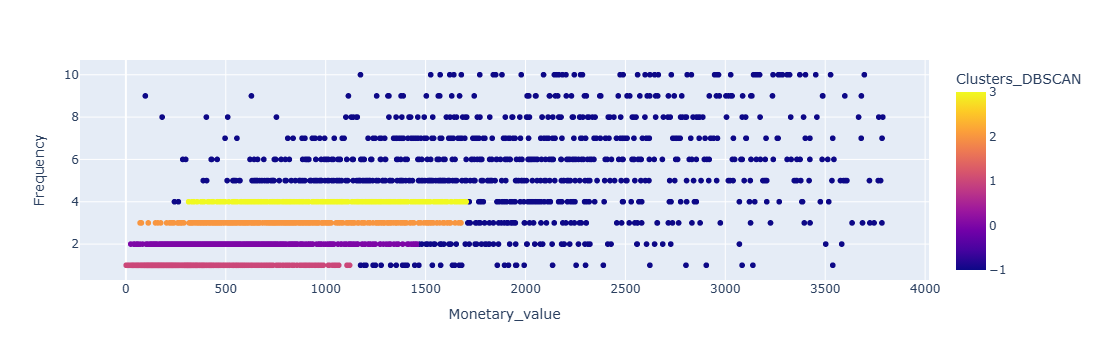

In [200]:
fig=px.scatter(data_frame = final_df,x='Monetary_value',y='Frequency',color='Clusters_DBSCAN')
iplot(fig)

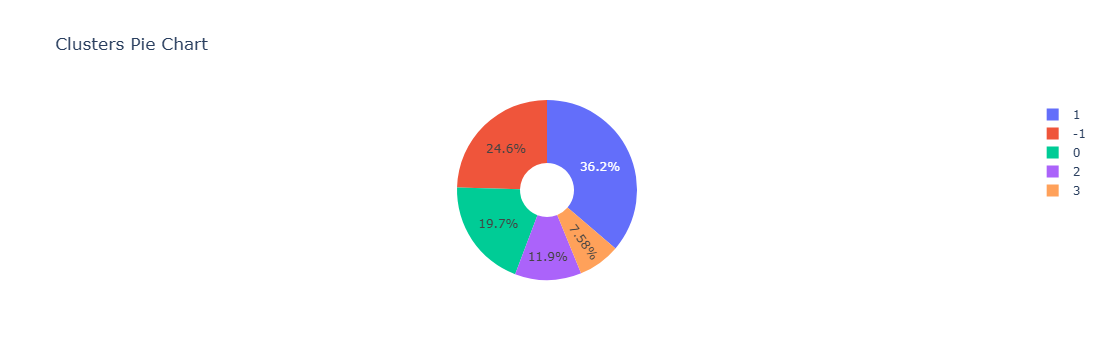

In [104]:
fig = px.pie(data_frame=final_df,names='Clusters_DBSCAN',title='Clusters Pie Chart',hole=.3)

iplot(fig)

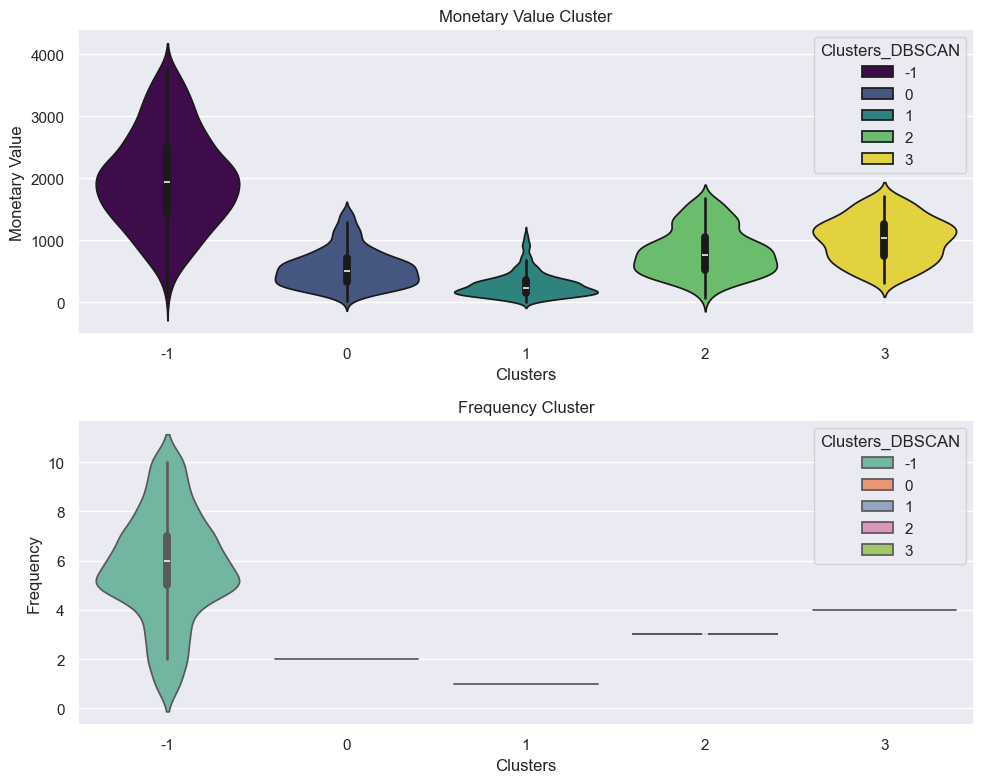

In [102]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.violinplot(data = final_df,x='Clusters_DBSCAN',y='Monetary_value',palette='viridis',hue='Clusters_DBSCAN')
plt.title('Monetary Value Cluster')
plt.xlabel('Clusters')
plt.ylabel('Monetary Value')

plt.subplot(2,1,2)
sns.violinplot(data = final_df,x='Clusters_DBSCAN',y='Frequency',palette='Set2',hue='Clusters_DBSCAN')
plt.title('Frequency Cluster')
plt.xlabel('Clusters')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analysis Results of DBSCAN Clustering

### Cluster -1 (Irregular Buyers / Noise)
* Label: "Irregular Buyers"
* Description: These customers exhibit inconsistent spending patterns, including some high spenders with irregular purchase behavior. DBSCAN classifies them as noise because they do not fit into a clear segment.

### Cluster 0 (Low-Value Infrequent)
* Label: "Low-Value Infrequent"
* Description: These customers have low purchase frequency and low spending. They may be one-time buyers or disengaged customers who haven't made recent purchases.

### Cluster 1 (Very Low-Value Rare Buyers)
* Label: "Very Low-Value Rare Buyers"
* Description: These customers rarely purchase and spend very little. They might be completely inactive or disengaged from the store.

### Cluster 2 (Moderate-Value Seasonal Shoppers)
* Label: "Moderate-Value Seasonal Shoppers"
* Description: These customers have moderate spending but shop infrequently. They might be seasonal shoppers who buy occasionally but in reasonable amounts.

### Cluster 3 (Loyal High-Spender)
* Label: "Loyal High-Spender"
* Description: These are the most valuable customers, shopping frequently and spending the highest amounts. They are likely brand-loyal repeat buyers.

In [204]:
cluster_labels = {
    -1:"Irregular Buyers",
    0:"Low-Value Infrequent",
    1:"Very Low-Value Rare Buyers",
    2:"Moderate-Value Seasonal Shoppers",
    3:"Loyal High-Spender"
}

In [230]:
final_df['DBSCAN Labels'] = final_df['Clusters_DBSCAN'].map(cluster_labels)

In [236]:
final_df.head()

,Monetary_value,Frequency,Clusters_KMeans,Clusters_DBSCAN,KMeans Labels,DBSCAN Labels
Customer ID,,,,,,
12346.0,169.36,2,0,0,Low-Value Infrequent,Low-Value Infrequent
12347.0,1323.32,2,2,0,Average Customer,Low-Value Infrequent
12348.0,221.16,1,0,1,Low-Value Infrequent,Very Low-Value Rare Buyers
12349.0,2221.14,2,3,-1,Loyal High-Spender,Irregular Buyers
12351.0,300.93,1,0,1,Low-Value Infrequent,Very Low-Value Rare Buyers


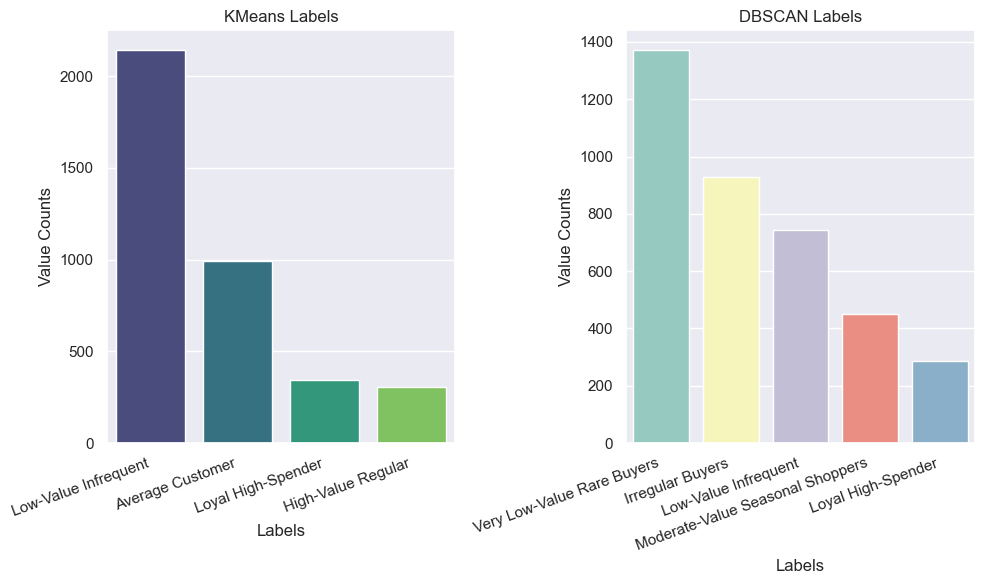

In [264]:
K = final_df['KMeans Labels'].value_counts()
D = final_df['DBSCAN Labels'].value_counts()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=K.index,y=K.values,palette='viridis')
plt.title('KMeans Labels')
plt.ylabel('Value Counts')
plt.xlabel('Labels')
plt.xticks(rotation=20, ha="right")
plt.subplot(1,2,2)
sns.barplot(x=D.index,y=D.values,palette='Set3')
plt.title('DBSCAN Labels')
plt.ylabel('Value Counts')
plt.xlabel('Labels')
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()